In [1]:
import sympy as sym
import numpy as np
import time
import cloudpickle
import matplotlib.pyplot as plt
import matplotlib.animation as ani
plt.style.use(['fivethirtyeight','seaborn-deep'])
from IPython.display import HTML

m = [0]*3

with open("Feasible_Solution/damp_x2/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/damp_x2/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/damp_x2/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
N = m[0].N[-1]

cN = m[0].cN[-1]

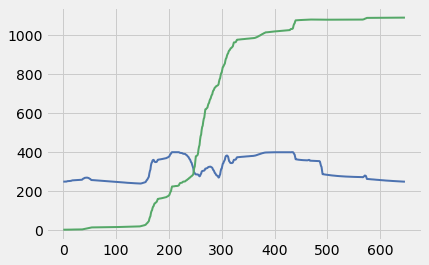

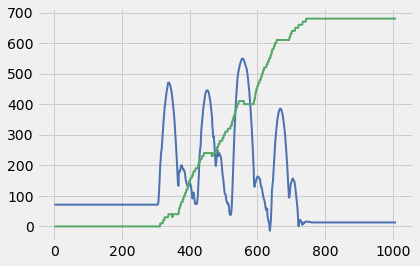

In [2]:
# servo stuff

R = []
L = []
A = []
time = []
cN_time = []
cN_adder = 0
adder = 0
P = []
V = []

for i in range(0, 3):
    if(i>0):
        cN_adder += (m[i-1].tt[N,cN].value - m[i-1].tt[1,1].value)
    for n in range(1, N+1):
        for c in range(1, cN+1):
            cN_time.append(m[i].tt[n,c].value - m[i].tt[1,1].value + cN_adder)
            
for i in range(0, 3):
    if(i>0):
        adder += (m[i-1].tt0[N].value - m[i-1].tt0[1].value)
    for n in range(1, N+1):
        time.append(m[i].tt0[n].value - m[i].tt0[1].value + adder)

z = []
x = []
r = []
l = []
for i in range(0, 3):
    if(i>0):
        adder += m[i-1].q[N,cN,'x'].value*1000
    for n in range(1, N+1):
        for c in range(1, cN+1):
            z.append(m[i].q[n,c,'z'].value*1000)
            x.append(m[i].q[n,c,'x'].value*1000 + adder) 
            r.append(m[i].q[n,c,'theta_l_R'].value*180/np.pi)
            l.append(m[i].q[n,c,'theta_l_L'].value*180/np.pi)

encoder_1 = [71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,71.1659106,72.04235476,77.15334024,88.3871058,105.8616969,127.6387411,153.5102785,183.2403228,204.7787974,214.4326897,237.8699472,246.2931464,251.8936645,268.8982704,287.2969204,301.1659431,315.2131908,332.3928684,348.7424979,363.4808027,377.4279588,389.1686695,398.7503374,407.7528855,417.4581273,426.7111307,435.0172783,442.3936397,449.3515515,457.619738,465.5813221,469.4789238,470.6939268,470.6939268,469.9650968,468.3841983,465.4592874,461.7916702,458.2342716,454.5418518,448.9798885,442.1443573,434.013525,424.9419043,415.2935349,404.9300081,394.8738041,384.3533918,372.8368174,359.9081551,344.8701596,328.0791899,310.1785797,292.1133448,273.6158658,254.9687338,235.0563718,213.4402782,190.101502,166.0321659,142.109091,134.1554739,132.708012,176.0795928,180.6640391,178.0859723,179.5184503,185.0998488,190.6726713,197.2343691,197.9468387,200.3681044,197.8043568,193.3844518,190.8154491,187.2442711,184.3847587,186.100738,185.0998488,180.807213,178.5157729,172.4941653,161.7184519,153.7985465,147.7410368,143.4093647,139.6520644,136.470561,134.010746,132.5632436,131.694548,131.694548,133.5765379,136.6152188,138.3507864,139.7966296,141.5310788,138.4953898,132.9975369,129.5221793,121.1141349,112.1125232,100.3327368,91.30243721,94.36233724,102.3702485,110.9500463,107.8975214,92.61397552,88.67868799,80.65636359,73.94104479,73.94104479,73.94104479,72.62660703,72.91871991,74.37915033,77.44531141,88.97025938,103.0977837,124.4498924,146.1532211,168.1873234,204.2100099,228.8564726,245.4520266,253.0123036,261.5255488,280.1213478,312.6294787,325.6482399,335.7557223,348.2089112,359.5106994,374.9373615,386.3074746,394.6149825,402.3585742,408.5217196,416.3126232,426.8374067,431.8777421,436.6465678,441.1466892,443.5147431,444.5103608,445.3808155,444.8834942,444.5103608,443.5147431,442.3936397,438.5237235,432.8832911,426.3322249,420.6346698,414.9111679,408.3936116,398.8793675,387.9988718,376.5108518,367.0453787,357.2565922,326.053622,317.9291424,296.9188688,292.1133448,294.448829,281.2267986,266.5359114,250.0748295,231.1125622,206.6266663,197.6618689,208.0473806,213.5820708,239.6972192,245.0313658,250.3547343,237.3074629,229.5616931,236.1821476,239.8377275,240.1187224,238.0105502,234.7748562,233.0851628,230.6896821,226.4574223,220.5218542,209.4674611,195.8089799,181.3798534,170.7719894,161.7184519,156.5361531,145.8644692,132.418471,121.8394675,110.2233883,106.0071341,105.4253662,103.9707223,95.67333731,88.09551284,81.9696358,77.59129346,77.15334024,75.83935418,71.75021544,74.67120937,70.72765919,64.88250148,48.6465088,44.10860931,39.5694186,37.22614889,37.95845271,38.69072763,46.74368442,62.25113176,84.15797175,115.8890516,153.7985465,176.6529519,211.1707151,237.1668237,270.5643938,302.2605361,326.053622,349.1425764,374.806163,398.1050048,416.5672685,433.2601546,451.4553118,467.288317,480.6025337,491.4833477,500.828895,506.3438445,511.8247224,516.6933996,522.338414,527.7171291,531.8129988,536.1136365,539.7169433,543.0797557,545.982153,547.8737992,548.5402883,549.0952365,548.9842803,548.096029,547.0954692,544.3090613,541.063849,537.3541651,533.6266558,530.1089286,525.4326335,522.453222,519.6934457,518.0793621,511.1269459,505.1732919,496.2270598,487.0740821,475.6604086,465.3372386,454.0485854,441.895021,427.7209741,413.1252865,397.8467869,381.7438526,365.0660599,347.0077211,327.9442218,307.3153301,286.4701662,264.4495277,241.9444743,217.2663825,188.5303094,143.9871507,129.81188,130.3912341,135.3131493,146.2975903,146.5863154,150.6265753,153.6544149,156.1040131,159.9917182,162.869214,162.7253861,163.3006681,161.5745844,159.9917182,158.4082624,156.9682502,155.6718303,151.636082,143.6982665,135.8918883,128.6529824,129.0875985,127.059089,119.6631937,113.8558279,106.8796889,100.6238468,94.36233724,89.84490835,87.22066969,84.30384048,79.05098319,69.26668181,62.54353699,57.86416308,53.32929695,59.03418148,57.57164077,57.86416308,32.09925955,27.70382237,19.6436352,18.7642192,11.87482467,8.942898142,-6.743879781,-14.07367657,-3.371967059,5.86425865,20.22990062,45.86537603,77.15334024,117.9215835,126.6243093,140.3748478,148.0296723,167.7563836,189.6730642,208.0473806,227.3043746,245.7324298,265.145191,279.7066628,293.2127177,305.1310336,316.4358463,327.8092438,338.5755822,347.5416892,355.2650616,362.2908131,368.6270231,373.3622266,377.689886,381.0907398,383.5710204,385.1353418,384.8747387,385.5261585,383.4405842,380.5680406,377.296978,373.624863,369.0221818,363.084239,356.0619668,347.4082131,338.3072195,329.1585742,319.5568561,308.9519807,297.0560075,283.4360534,268.6204682,253.1520988,237.0261774,220.3803855,202.3607643,183.0972431,163.3006681,142.5425547,120.5338025,101.9336898,93.92528532,100.1871771,108.4790677,127.059089,132.418471,140.9529977,142.109091,146.0088474,148.606889,153.3661375,156.6801902,155.6718303,154.0867958,151.7802788,148.7511819,147.3080499,145.2869123,138.4953898,129.5221793,118.0667375,107.8975214,94.79936329,84.74143121,74.96325931,65.75948369,51.13443822,33.12473936,7.916696284,0.1466076564,10.11568383,18.32450343,19.35049888,21.10928017,21.10928017,19.79020246,16.85874858,14.80660651,11.87482467,7.916696284,5.277840931,10.70206942,12.16800996,12.46119376,9.969086651,9.529293308,12.46119376,13.63391342,14.36684986,14.95319116,15.68610751,15.39294237,15.68610751,15.68610751,15.68610751,15.68610751,15.68610751,15.68610751,14.66002141,14.36684986,14.36684986,14.36684986,14.36684986,14.36684986,14.36684986,13.19414654,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666,12.9009666]
encoder_2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.06,0.06,0.06,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.08,0.09,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.11,0.11,0.12,0.12,0.12,0.12,0.13,0.13,0.14,0.14,0.14,0.15,0.15,0.15,0.15,0.16,0.16,0.16,0.16,0.16,0.17,0.17,0.17,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.2,0.2,0.21,0.21,0.21,0.21,0.22,0.22,0.22,0.22,0.22,0.23,0.23,0.23,0.23,0.23,0.23,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.23,0.23,0.23,0.23,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.25,0.25,0.26,0.26,0.26,0.26,0.27,0.27,0.27,0.27,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.28,0.29,0.29,0.29,0.29,0.3,0.3,0.3,0.3,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.33,0.33,0.33,0.33,0.34,0.34,0.35,0.35,0.35,0.36,0.36,0.36,0.37,0.37,0.38,0.38,0.38,0.39,0.39,0.39,0.4,0.4,0.4,0.4,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.41,0.41,0.42,0.42,0.43,0.44,0.44,0.45,0.45,0.45,0.46,0.46,0.46,0.47,0.47,0.47,0.47,0.48,0.48,0.48,0.48,0.49,0.49,0.49,0.5,0.5,0.5,0.51,0.51,0.51,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.53,0.53,0.53,0.53,0.54,0.54,0.54,0.54,0.55,0.55,0.55,0.55,0.56,0.56,0.56,0.57,0.57,0.58,0.58,0.58,0.58,0.58,0.59,0.59,0.59,0.6,0.6,0.6,0.6,0.6,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.62,0.62,0.62,0.63,0.63,0.63,0.63,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.66,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68,0.68]
encoder_2 = [x*1000 for x in encoder_2]

plt.axes()
plt.grid(True)
plt.plot(z, linewidth=2)
plt.plot(x, linewidth=2)
plt.show()
plt.plot(encoder_1, linewidth=2)
plt.plot(encoder_2, linewidth=2)
# plt.plot(r, linewidth=2)
# plt.plot(l, linewidth=2)
plt.show()
            
# plt.axes()
# t = np.arange(0, 5, 0.1)
# plt.xticks(t)
# ty = np.arange(-5, 5, 0.5)
# plt.yticks(ty)
# plt.grid(True)
# for n in range (0,len(R)):
#     plt.plot(time[n], R[n], 'k.', c='red')
#     plt.plot(time[n], L[n], 'k.', c='black')
#     plt.xlabel('Nodes')
#     plt.ylabel('Piston velocity')
#     plt.title('Piston velocity')
# plt.show()
